In [1]:
import pandas as pd
import numpy as np

In [12]:
f_format = '../../data/preprocessed/gex_counts_by_sample/{0}/{0}_reps_{1}_rna_counts_all_genes.txt'

In [5]:
clusts = open('../../data/ref/cluster_list.txt').read().split('\n')

In [7]:
import sys
sys.path.insert(0, '../../scripts')
from common_funcs import *

In [8]:
specie='human'

In [9]:
specie='human'

In [10]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# get variance over all samples (psuedobulk)

In [13]:
dfs = []
clust_groups = []
for clust in clusts:
    df = pd.read_csv(f_format.format(specie, clust),
                 header = None,
                 sep = '\t').set_index(0)
    clust_groups = clust_groups + [clust]*df.shape[1]
    dfs.append(df.sum(axis=1).rename(clust))

In [19]:
entropy_vals = my_gene_entropy(dfs, norm=False)

In [20]:
import matplotlib.pyplot as plt

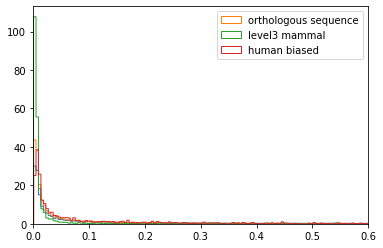

In [41]:
_, bins, _ = plt.hist(entropy_vals, bins = 1000, density=True, histtype='step')
plt.xlim(0, .6)
_ = plt.hist(entropy_vals.loc[annotation['four_species_1to1_ortholog'] &annotation['active_genes']], bins, density=True, histtype='step', label='orthologous sequence')
_ = plt.hist(entropy_vals.loc[annotation['mammal_level3']], bins, density=True, histtype='step', label='level3 mammal')
_ = plt.hist(entropy_vals.loc[annotation['human_biased']], bins, density=True, histtype='step', label='human biased')
plt.legend()

In [23]:
entropy_vals.to_csv('../../../data/gex_entropy_based_specificity.tsv')

OSError: Cannot save file into a non-existent directory: '../../../data/processed'

# use gaussian KDE

In [43]:
from scipy.stats import gaussian_kde

In [44]:
import seaborn as sns

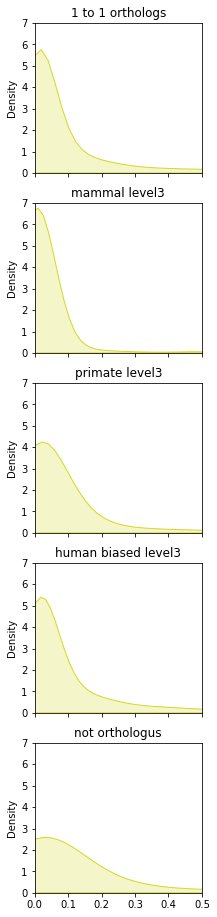

In [70]:
fig, axs = plt.subplots(5, 1, figsize=(3, 16), sharey=True, sharex=True)
axs = axs.flatten()
sns.kdeplot(entropy_vals.loc[annotation['four_species_1to1_ortholog'] & annotation['active_genes']].values, ax= axs[0], fill=True, color='#D5D924')
# sns.kdeplot(entropy_vals.loc[annotation['four_species_1to1_ortholog']].values, ax= axs[0],  color='black')

axs[0].set_title('1 to 1 orthologs')
sns.kdeplot(entropy_vals.loc[annotation['mammal_level3']].values, ax = axs[1], fill=True, color='#D5D924')
axs[1].set_title('mammal level3')
sns.kdeplot(entropy_vals.loc[annotation['primate_level3']].values, ax = axs[2], fill=True, color='#D5D924')
axs[2].set_title('primate level3')
sns.kdeplot(entropy_vals.loc[annotation['human_biased']].values, ax = axs[3], fill=True, color='#D5D924')
axs[3].set_title('human biased level3')
# axs[3].set_xlabel('cell-type specificity')
axs[4].set_xlim(0, .5)
axs[4].set_title('not orthologus')
axs[3].set_xlabel('cell-type specificity')
sns.kdeplot(entropy_vals.loc[~annotation['four_species_1to1_ortholog'] &annotation['active_genes']], ax= axs[4], fill=True, color='#D5D924')
# for ax in axs:
#     ax.vlines(.01, 0, 7, color='black', linestyle='--')
axs[3].set_ylim(0, 7) 
plt.savefig('../../../figures/gex_final/gex_cell_specifcity.pdf', dpi=400, bbox_inches='tight' )

In [58]:
[i for i in annotation.columns if 'active' in i]

['ASC_active',
 'ChC_active',
 'Endo_active',
 'L2_3_IT_active',
 'L4_5_IT_active',
 'L5_6_NP_active',
 'L5_ET_active',
 'L5_IT_active',
 'L6b_active',
 'L6_CT_active',
 'L6_IT_CAR3_active',
 'L6_IT_active',
 'LAMP5_active',
 'MGC_active',
 'ODC_active',
 'OPC_active',
 'PVALB_active',
 'SNCG_active',
 'SST_active',
 'VIP_active',
 'VLMC_active',
 'active_genes']

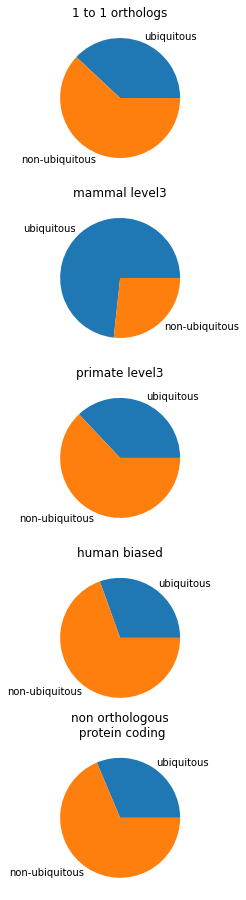

In [67]:
fig, axs = plt.subplots(5, 1, figsize=(3,16))
axs = axs.flatten()
axs[0].set_title('1 to 1 orthologs')
axs[0].pie(
    [(entropy_vals.loc[annotation['four_species_1to1_ortholog']& annotation['active_genes']].values<.01).sum(),
     (entropy_vals.loc[annotation['four_species_1to1_ortholog'] & annotation['active_genes']].values>.01).sum()],
    labels=['ubiquitous', 'non-ubiquitous']
    )
axs[1].pie(
    [(entropy_vals.loc[annotation['mammal_level3']].values<.01).sum(),
     (entropy_vals.loc[annotation['mammal_level3']].values>.01).sum()],
    labels=['ubiquitous', 'non-ubiquitous']
    )
axs[1].set_title('mammal level3')
axs[2].pie(
    [(entropy_vals.loc[annotation['primate_level3']].values<.01).sum(),
     (entropy_vals.loc[annotation['primate_level3']].values>.01).sum()],
    labels=['ubiquitous', 'non-ubiquitous']
    )
axs[2].set_title('primate level3')
axs[3].pie(
    [(entropy_vals.loc[annotation['human_biased']].values<.01).sum(),
     (entropy_vals.loc[annotation['human_biased']].values>.01).sum()],
    labels=['ubiquitous', 'non-ubiquitous']
    )
axs[3].set_title('human biased')
axs[4].pie(
    [(entropy_vals.loc[~annotation['four_species_1to1_ortholog'] &annotation['active_genes']].values<.01).sum(),
     (entropy_vals.loc[~annotation['four_species_1to1_ortholog']&annotation['active_genes']].values>.01).sum()],
    labels=['ubiquitous', 'non-ubiquitous']
    )
axs[4].set_title('non orthologous\n protein coding')
# sns.kdeplot(entropy_vals.loc[annotation['primate_level3']].values, ax = axs[2], fill=True, color='#D5D924')
# axs[2].set_title('primate level3')
# sns.kdeplot(entropy_vals.loc[annotation['human_biased']].values, ax = axs[3], fill=True, color='#D5D924')
# axs[3].set_title('human biased level3')
# axs[3].set_xlabel('cell-type specificity')
# axs[3].set_xlim(0, .2)
plt.savefig('../../../figures/gex_final/ubiq_pie_chart_mammal_conserved.pdf', dpi=400, bbox_inches='tight', transparent=True)

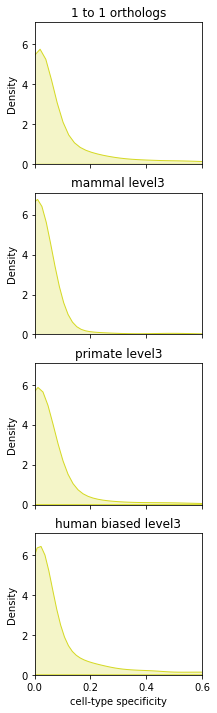

In [28]:
fig, axs = plt.subplots(4, 1, figsize=(3, 12), sharey=True, sharex=True)
axs = axs.flatten()
sns.kdeplot(entropy_vals.loc[annotation['four_species_1to1_ortholog'] & annotation['active_genes']].values, ax= axs[0], fill=True, color='#D5D924')
# sns.kdeplot(entropy_vals.loc[annotation['four_species_1to1_ortholog']].values, ax= axs[0],  color='black')

axs[0].set_title('1 to 1 orthologs')
sns.kdeplot(entropy_vals.loc[annotation['mammal_level3']].values, ax = axs[1], fill=True, color='#D5D924')
axs[1].set_title('mammal level3')
sns.kdeplot(entropy_vals.loc[annotation['primate_level3'] | annotation['mammal_level3']].values, ax = axs[2], fill=True, color='#D5D924')
axs[2].set_title('primate level3')
sns.kdeplot(entropy_vals.loc[annotation['human_biased']].values, ax = axs[3], fill=True, color='#D5D924')
axs[3].set_title('human biased level3')
axs[3].set_xlabel('cell-type specificity')
axs[3].set_xlim(0, .6)
plt.savefig('../../../figures/gex_final/gex_cell_specifcity.pdf', dpi=400, bbox_inches='tight' )

In [ ]:
fig, ax = plt.subplots()